# Binary Classification

Author : Bayu Aditya

## Data Processing

### Create Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import sklearn.datasets as skds
import sklearn.preprocessing as skpp
import sklearn.model_selection as skms

In [37]:
x, y = skds.make_classification(n_samples=500, n_features = 2, n_redundant=0)
print(x.shape, y.shape)

(500, 2) (500,)


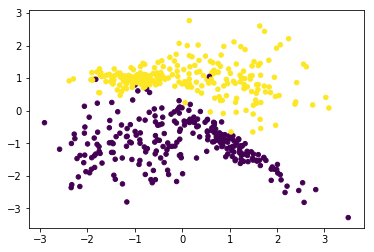

In [38]:
plt.scatter(x[:,0], x[:,1], c=y, s=20)

### Create Data Frame and Describe Data

**Data X**

In [39]:
df_x = pd.DataFrame(x)
df_x.head()

,0,1
0,0.812498,-0.922026
1,-1.458380,-1.283959
2,1.437240,0.969472
3,0.413250,0.761230
4,-0.937288,0.606925


In [40]:
df_x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,500.0,0.014640,1.233014,-2.907656,-0.942978,-0.053693,1.007134,3.502997
1,500.0,-0.022993,1.164427,-3.283832,-1.008725,0.124383,0.963581,2.766686


In [41]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
0    500 non-null float64
1    500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


**Data Y**

In [42]:
df_y = pd.DataFrame(y)
df_y.head(30).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,1,1,0,1,0,0,1,0,1,1


In [43]:
df_y.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,500.0,0.498,0.500497,0.0,0.0,0.0,1.0,1.0


In [44]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
0    500 non-null int32
dtypes: int32(1)
memory usage: 2.0 KB


### Splitting Data Train and Data Test

In [45]:
X_train, X_test, y_train, y_test = skms.train_test_split(df_x, df_y,
                                                         test_size = 0.3,
                                                         random_state = 101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(350, 2) (150, 2) (350, 1) (150, 1)


In [46]:
col_input = X_train.shape[1]
col_output = y_train.shape[1]

## Build Classification Model

### Create Model

Activation Function (sigmoid) : $$\phi(z) = \frac{1}{1 + e^{-z}}$$

where : $$z = x*w + b$$

which : $y$ and $x$ is placeholder, $w$ and $b$ is Variable

In [26]:
x_tensor = tf.placeholder(tf.float32, shape = (None, col_input))
y_tensor = tf.placeholder(tf.float32, shape = (None, col_output))

w = tf.Variable(np.ones(shape = (col_input, col_output)), dtype = tf.float32)
b = tf.Variable(np.ones(shape = [col_output]), dtype = tf.float32)

z_tensor = tf.matmul(x_tensor, w) + b
model = tf.nn.sigmoid(z_tensor)

### Loss Function

loss function for binary classification : $$loss = -\frac{1}{N}\sum^{N}_{i=1}\left[\left(y_i\log{\phi(z)}\right) + \left(1-y_i\right)\log{(1-\phi(z))}\right]$$
where : $y_i$ is y_tensor and $\phi(z)$ is activation function

In [27]:
loss = -tf.reduce_mean((y_tensor*tf.log(model)) + (1-y_tensor)*(tf.log(1-model)))

### Gradient Descent Optimizer 

In [28]:
learning_rt = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rt).minimize(loss)

### Activate Session

In [47]:
n_epochs = 1000
loss_train_epochs = []
loss_test_epochs = []

with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    feed_dict_train = {x_tensor:X_train, y_tensor:y_train}
    feed_dict_test = {x_tensor:X_test, y_tensor:y_test}
    for i in range (n_epochs):
        tfs.run(optimizer, feed_dict_train)
        
        loss_train_per_epochs = tfs.run(loss, feed_dict_train)
        loss_test_per_epochs = tfs.run(loss, feed_dict_test)
        
        loss_train_epochs.append(loss_train_per_epochs)
        loss_test_epochs.append(loss_test_per_epochs)
        
        y_pred = tfs.run(model, feed_dict_test)
        y_orig = tfs.run(y_tensor, feed_dict_test)
        
        w_result, b_result = tfs.run([w,b])
        
        if (i % 100 == 0):
            print('EPOCHS : ',i)
            print('Loss Data Train : ', loss_train_per_epochs)
            print('Loss Data Test : ', loss_test_per_epochs)
            print('-'*50)
            
    print('='*25, 'Final Result', '='*25)
    print('Loss Data Train : ', loss_train_per_epochs)
    print('Loss Data Test : ', loss_test_per_epochs)

EPOCHS :  0
Loss Data Train :  0.525889
Loss Data Test :  0.482387
--------------------------------------------------
EPOCHS :  100
Loss Data Train :  0.170699
Loss Data Test :  0.19853
--------------------------------------------------
EPOCHS :  200
Loss Data Train :  0.138319
Loss Data Test :  0.170132
--------------------------------------------------
EPOCHS :  300
Loss Data Train :  0.124002
Loss Data Test :  0.157361
--------------------------------------------------
EPOCHS :  400
Loss Data Train :  0.115401
Loss Data Test :  0.149829
--------------------------------------------------
EPOCHS :  500
Loss Data Train :  0.10953
Loss Data Test :  0.144853
--------------------------------------------------
EPOCHS :  600
Loss Data Train :  0.105223
Loss Data Test :  0.141342
--------------------------------------------------
EPOCHS :  700
Loss Data Train :  0.101911
Loss Data Test :  0.138756
--------------------------------------------------
EPOCHS :  800
Loss Data Train :  0.0992761
L

## Prediction Result and Analyze Model

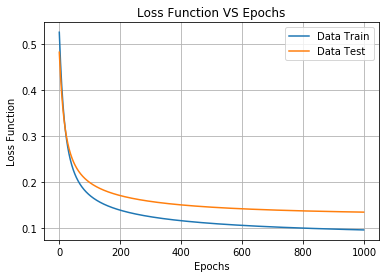

In [48]:
plt.plot(loss_train_epochs, label = 'Data Train')
plt.plot(loss_test_epochs, label = 'Data Test')
plt.title('Loss Function VS Epochs')
plt.xlabel('Epochs'); plt.ylabel('Loss Function')
plt.legend(); plt.grid()

In [50]:
prediction = []

for i in range(len(y_pred)):
    if (y_pred[i] >= 0.5):
        prediction.append(1)
    else:
        prediction.append(0)
print('Prediction result : ', '\n', prediction,'\n')
print('Original test : ', '\n', y_orig.reshape(-1))

Prediction result :  
 [1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1] 

Original test :  
 [ 1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.
  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0.  1.  1.
  0.  1.  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.
  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.
  1.  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1

In [52]:
result = [0,0,0,0]

for i in range (len(y_pred)):
    if (y_orig[i] == 0 and prediction[i] == 0):
        result[0] += 1
    elif (y_orig[i] == 0 and prediction[i] == 1):
        result[1] += 1
    elif (y_orig[i] == 1 and prediction[i] == 0):
        result[2] += 1
    else:
        result[3] += 1

print('original 0 and prediction 0 : ', result[0])
print('original 0 and prediction 1 : ', result[1])
print('original 1 and prediction 0 : ', result[2])
print('original 1 and prediction 1 : ', result[3])
print('accuraccy : ', (result[0] + result[3])/(result[0] + result[1] + result[2] + result[3])*100, '%')

original 0 and prediction 0 :  61
original 0 and prediction 1 :  4
original 1 and prediction 0 :  1
original 1 and prediction 1 :  84
accuraccy :  96.66666666666667 %


In [53]:
print('weight value : \n',w_result, '\n\n', 'bias value : \n', b_result)

weight value : 
 [[ 1.01251471]
 [ 4.52856731]] 

 bias value : 
 [-0.31963879]


# Multiclass Classification

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
import sklearn.preprocessing as skpp
import sklearn.model_selection as skms

In [3]:
MNIST = pd.read_csv('MNIST/train.csv')
MNIST.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data X

In [4]:
MNIST_x = MNIST.drop('label', axis = 1)
MNIST_x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
MNIST_x.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
MNIST_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


### Data Test

In [7]:
MNIST_y = MNIST['label']
MNIST_y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
MNIST_y.describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [9]:
MNIST_y = MNIST_y.values
if (MNIST_y.ndim == 1):
    MNIST_y = MNIST_y.reshape(len(MNIST_y), 1)

## Standard Scaler

In [10]:
scale_x = skpp.StandardScaler()
MNIST_x = scale_x.fit_transform(MNIST_x)

## Split Data Train, Data Test and Encode

In [11]:
encode = skpp.OneHotEncoder()
MNIST_y = encode.fit_transform(MNIST_y).toarray()

X_train, X_test, y_train, y_test = skms.train_test_split(MNIST_x, MNIST_y,
                                                         test_size = 0.2, 
                                                         random_state = 101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784) (8400, 784) (33600, 10) (8400, 10)


In [12]:
col_input = X_train.shape[1]
col_output = y_train.shape[1]

## Build Multiclass Classification Model

Linear Equation : $$z = x*w + b$$

Activation Function : Softmax $$\phi_i(z) = \frac{e_i^z}{\sum_j e_j^z}$$

In [18]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3306792161412843873
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1468914073
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18109535449317309994
physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [13]:
def data_batch_func(data_x, data_y, batch_size):
    import numpy as np
    x_batch = np.zeros(shape = (batch_size, data_x.shape[1]))
    y_batch = np.zeros(shape = (batch_size, data_y.shape[1]))
    for i in range(batch_size):
        index = np.random.randint(low = 0, high = len(data_x))
        x_batch[i, :] = data_x[index, :]
        y_batch[i, :] = data_y[index, :]
    return x_batch, y_batch

In [14]:
with tf.device('/device:GPU:0'):
    x_tensor = tf.placeholder(tf.float32, shape = (None, col_input))
    y_tensor = tf.placeholder(tf.float32, shape = (None, col_output))

    w = tf.Variable(np.zeros(shape = (col_input, col_output)), dtype = tf.float32)
    b = tf.Variable(np.zeros(shape = col_output), dtype = tf.float32)

    model = tf.nn.softmax((tf.matmul(x_tensor,w) + b))

Loss Function : $$loss = -\frac{1}{N}\sum_N \sum_{i=1}^{10} y_i \log{\phi_i}$$

In [15]:
loss = -tf.reduce_mean(tf.reduce_sum(y_tensor * tf.log(model), axis=1))

In [16]:
learning_rt = .001
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rt).minimize(loss)

## Activate Session

In [17]:
configuration = tf.ConfigProto()
configuration.log_device_placement = True
configuration.allow_soft_placement = True
configuration.gpu_options.allow_growth = True

-------------------------------------------------- 
 EPOCHS :  0 
 Loss Data Train:  0.438122 
 Loss Data Test :  0.439972 
 Accuracy :  88.4166666667
-------------------------------------------------- 
 EPOCHS :  3 
 Loss Data Train:  0.323204 
 Loss Data Test :  0.333168 
 Accuracy :  90.4285714286
-------------------------------------------------- 
 EPOCHS :  6 
 Loss Data Train:  0.295819 
 Loss Data Test :  0.310311 
 Accuracy :  91.0952380952
-------------------------------------------------- 
 EPOCHS :  9 
 Loss Data Train:  0.280742 
 Loss Data Test :  0.300181 
 Accuracy :  91.4285714286
-------------------------------------------------- 
 EPOCHS :  12 
 Loss Data Train:  0.271539 
 Loss Data Test :  0.294786 
 Accuracy :  91.4404761905
-------------------------------------------------- 
 EPOCHS :  15 
 Loss Data Train:  0.264767 
 Loss Data Test :  0.291902 
 Accuracy :  91.5119047619
-------------------------------------------------- 
 EPOCHS :  18 
 Loss Data Train:  0.2595

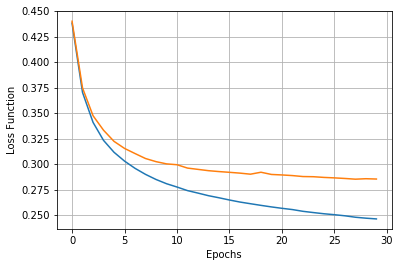

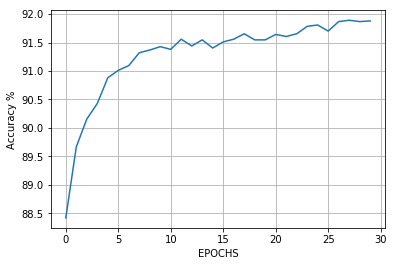

In [21]:
n_epochs = 30
batchs_size = 10
n_batchs = int(X_train.shape[0] / batchs_size)
loss_train_epochs = []
loss_test_epochs = []
accuracy_epochs = []

feed_train = {x_tensor:X_train, y_tensor:y_train}
feed_test = {x_tensor:X_test, y_tensor:y_test}

with tf.Session(config = configuration) as tfs:
    tfs.run(tf.global_variables_initializer())
    for i in range (n_epochs):
        for batch in range (n_batchs):
            x_batch, y_batch = data_batch_func(X_train, y_train, batch_size = batchs_size)
            tfs.run(optimizer, {x_tensor:x_batch, y_tensor:y_batch})
        
        #Loss Function
        loss_train_per_epochs = tfs.run(loss, feed_train)
        loss_test_per_epochs = tfs.run(loss, feed_test)
        loss_train_epochs.append(loss_train_per_epochs) 
        loss_test_epochs.append(loss_test_per_epochs)
        
        #Accuracy
        y_pred_equal = tfs.run(tf.cast(tf.equal(tf.argmax(model, axis = 1),
                                        tf.argmax(y_test, axis = 1)), dtype = tf.float32), {x_tensor:X_test})
        right_value = tfs.run(tf.reduce_sum(y_pred_equal))
        accuracy_per_epochs = (right_value / y_test.shape[0])*100
        
        accuracy_epochs.append(accuracy_per_epochs)
        
        if (i%(n_epochs/10) == 0):
            print('-'*50, '\n EPOCHS : ',i,'\n Loss Data Train: ',loss_train_per_epochs,
                 '\n Loss Data Test : ',loss_test_per_epochs, '\n',
                 'Accuracy : ', accuracy_per_epochs)
    
    print('='*25, 'Final Result', '='*25, '\n Loss : ', loss_train_per_epochs)
            
plt.plot(loss_train_epochs)
plt.plot(loss_test_epochs)
plt.xlabel('Epochs'); plt.ylabel('Loss Function')
plt.grid()
plt.show()

plt.plot(accuracy_epochs)

plt.xlabel('EPOCHS'); plt.ylabel('Accuracy %')
plt.grid()